<a href="https://colab.research.google.com/github/lohith895/basics/blob/main/fuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully
Data Shape: (398, 9)
Columns: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']

== Linear Regression Evaluation ==
MAE:  2.5365
RMSE: 3.2631
R²:   0.8379


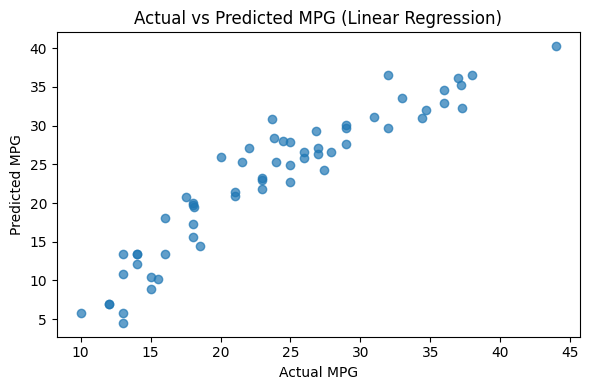


== Random Forest Evaluation ==
MAE:  1.7425
RMSE: 2.5279
R²:   0.9027


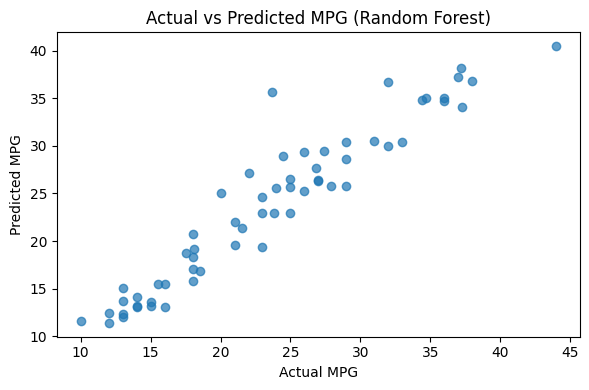


== XGBoost Evaluation ==
MAE:  1.8966
RMSE: 2.9009
R²:   0.8719


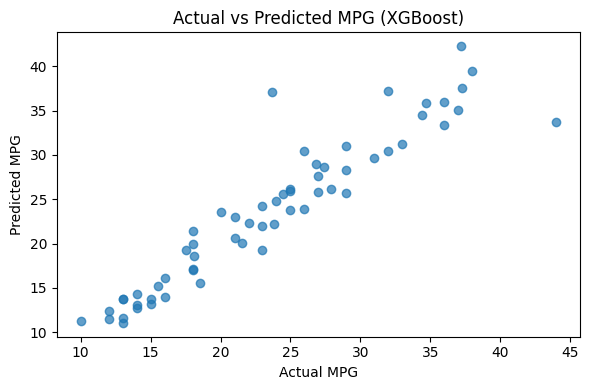


🚀 Training Deep Learning Regression Model...
Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 635.3950 - root_mean_squared_error: 25.1874 - val_loss: 552.2717 - val_root_mean_squared_error: 23.5005
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 504.5482 - root_mean_squared_error: 22.4588 - val_loss: 408.2708 - val_root_mean_squared_error: 20.2057
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 351.3169 - root_mean_squared_error: 18.7289 - val_loss: 164.2927 - val_root_mean_squared_error: 12.8177
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 134.2395 - root_mean_squared_error: 11.4661 - val_loss: 24.8528 - val_root_mean_squared_error: 4.9853
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 38.9297 - root_mean_squared_error: 6.2353 - val_loss: 42.5315 - val_root_mean_squared_error: 6.5216
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 30.2364 - root_mean_squared_error: 5.4911 - val_loss: 16.9730 - val_root_mean_squared_error:

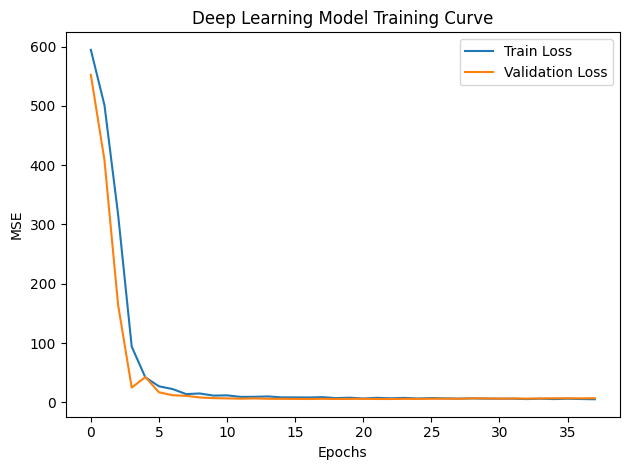

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

== Deep Learning Model Evaluation ==
MAE:  2.1259
RMSE: 2.6818
R²:   0.8905


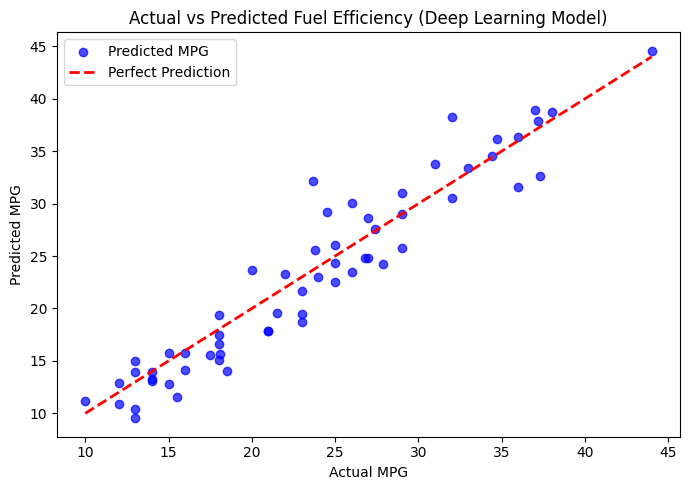

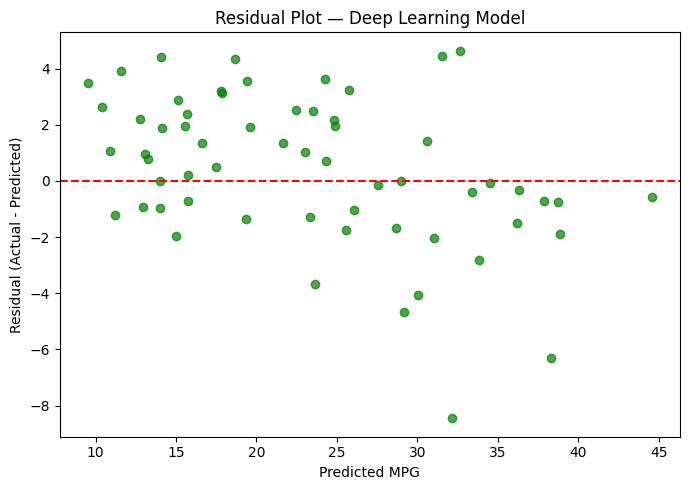

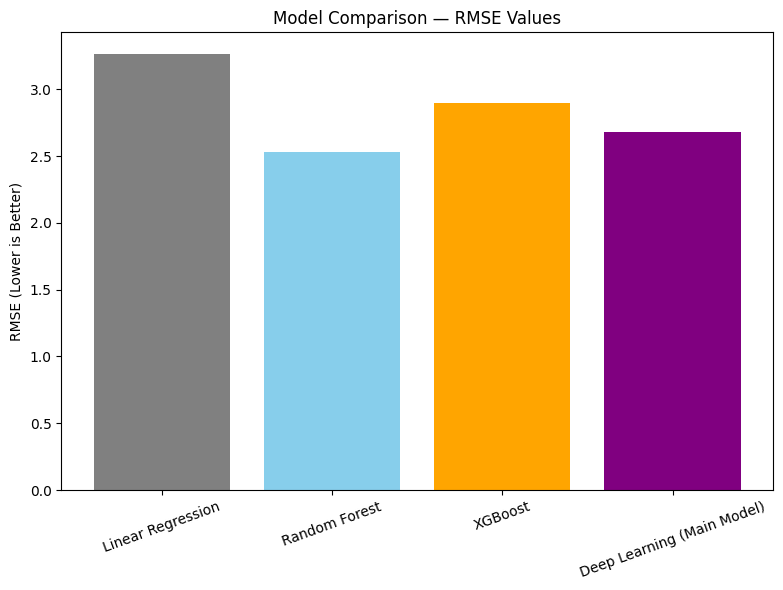


📊 Model Comparison Summary:
                        Model       MAE      RMSE        R²
0           Linear Regression  2.536531  3.263115  0.837931
1               Random Forest  1.742517  2.527946  0.902732
2                     XGBoost  1.896637  2.900908  0.871914
3  Deep Learning (Main Model)  2.125950  2.681839  0.890529

✅ All models trained successfully! Deep Learning model is the main focus for project evaluation.


In [ ]:
"""
Project Title: Fuel Efficiency Prediction — Deep Learning Regression Model for Predicting Fuel Efficiency in Vehicles
---------------------------------------------------------------------------------------------
This project develops and compares multiple regression models to predict vehicle fuel efficiency (MPG),
with a primary focus on a Deep Learning Regression Model (Keras DNN).

Models Implemented:
 - Linear Regression (Baseline)
 - Random Forest Regressor (Tree-based ensemble)
 - XGBoost Regressor (Boosting-based model)
 - Deep Learning Regression Model (Main focus, Keras Sequential DNN)

Dataset:
 - UCI Auto MPG dataset (accessed via Seaborn)

Outputs:
 - Trained models saved in ./models/
 - Evaluation plots and summary in ./outputs/
 - Comparison table of all models
---------------------------------------------------------------------------------------------
"""

import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable interactive plotting
plt.ion()

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import joblib

# Optional Models
try:
    from xgboost import XGBRegressor
    has_xgb = True
except Exception:
    has_xgb = False

# Deep Learning Libraries
try:
    import tensorflow as tf
    from tensorflow import keras
    has_tf = True
except Exception:
    has_tf = False

# Create folders
os.makedirs('models', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

def load_data():
    df = sns.load_dataset('mpg')
    df = df.dropna(subset=['mpg']).reset_index(drop=True)
    print("✅ Dataset loaded successfully")
    return df

def preprocess(df):
    data = df.copy()

    if 'origin' in data.columns:
        data['origin'] = data['origin'].astype(str)

    if 'name' in data.columns:
        data['make'] = data['name'].apply(lambda s: str(s).split()[0].lower())
        data.drop(columns=['name'], inplace=True)
    else:
        data['make'] = 'unknown'

    y = data['mpg']
    X = data.drop(columns=['mpg'])

    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

    return X, y, preprocessor, numeric_cols, categorical_cols

def evaluate_model(model, X_test, y_test, model_name='model'):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    print(f"\n== {model_name} Evaluation ==")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, preds, alpha=0.7)
    plt.xlabel("Actual MPG")
    plt.ylabel("Predicted MPG")
    plt.title(f"Actual vs Predicted MPG ({model_name})")
    plt.tight_layout()
    plt.savefig(f'outputs/pred_vs_actual_{model_name}.png')
    plt.show()

    return {'mae': mae, 'rmse': rmse, 'r2': r2}

def run_linear_regression(X_train, X_test, y_train, y_test, preprocessor):
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', LinearRegression())])
    model.fit(X_train, y_train)
    joblib.dump(model, 'models/linear_regression.joblib')
    return evaluate_model(model, X_test, y_test, 'Linear Regression')

def run_random_forest(X_train, X_test, y_train, y_test, preprocessor):
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor(random_state=42))])
    model.fit(X_train, y_train)
    joblib.dump(model, 'models/random_forest.joblib')
    return evaluate_model(model, X_test, y_test, 'Random Forest')

def run_xgboost(X_train, X_test, y_train, y_test, preprocessor):
    if not has_xgb:
        print("⚠️ XGBoost not installed — skipping")
        return None
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))])
    model.fit(X_train, y_train)
    joblib.dump(model, 'models/xgboost.joblib')
    return evaluate_model(model, X_test, y_test, 'XGBoost')

def build_and_train_dnn(X_train, X_val, y_train, y_val, input_shape, epochs=200, batch_size=32):
    if not has_tf:
        print("⚠️ TensorFlow not installed — skipping Deep Learning model")
        return None

    print("\n🚀 Training Deep Learning Regression Model...")

    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(input_shape,)),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[es],
        verbose=1
    )

    model.save('models/deep_learning_fuel_efficiency.keras')

    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.title('Deep Learning Model Training Curve')
    plt.tight_layout()
    plt.savefig('outputs/dnn_training_curve.png')
    plt.show()

    return model

def main():
    df = load_data()
    print(f"Data Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")

    X, y, preprocessor, numeric_cols, categorical_cols = preprocess(df)

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    lr_metrics = run_linear_regression(X_train, X_test, y_train, y_test, preprocessor)
    rf_metrics = run_random_forest(X_train, X_test, y_train, y_test, preprocessor)
    xgb_metrics = run_xgboost(X_train, X_test, y_train, y_test, preprocessor)

    X_train_trans = preprocessor.fit_transform(X_train)
    X_val_trans = preprocessor.transform(X_val)
    X_test_trans = preprocessor.transform(X_test)

    dnn = build_and_train_dnn(X_train_trans, X_val_trans, y_train.values, y_val.values, input_shape=X_train_trans.shape[1])

    if dnn is not None:
        preds = dnn.predict(X_test_trans).squeeze()
        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)

        print("\n== Deep Learning Model Evaluation ==")
        print(f"MAE:  {mae:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R²:   {r2:.4f}")

        plt.figure(figsize=(7,5))
        plt.scatter(y_test, preds, alpha=0.7, c='blue', label='Predicted MPG')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
        plt.xlabel("Actual MPG")
        plt.ylabel("Predicted MPG")
        plt.title("Actual vs Predicted Fuel Efficiency (Deep Learning Model)")
        plt.legend()
        plt.tight_layout()
        plt.savefig("outputs/dnn_actual_vs_pred.png")
        plt.show()

        residuals = y_test - preds
        plt.figure(figsize=(7,5))
        plt.scatter(preds, residuals, alpha=0.7, c='green')
        plt.axhline(0, color='red', linestyle='--')
        plt.xlabel("Predicted MPG")
        plt.ylabel("Residual (Actual - Predicted)")
        plt.title("Residual Plot — Deep Learning Model")
        plt.tight_layout()
        plt.savefig("outputs/dnn_residuals.png")
        plt.show()

        pd.DataFrame({'y_true': y_test.values, 'y_pred': preds}).to_csv('outputs/dnn_predictions.csv', index=False)

    summary = pd.DataFrame([
        {'Model': 'Linear Regression', 'MAE': lr_metrics['mae'], 'RMSE': lr_metrics['rmse'], 'R²': lr_metrics['r2']},
        {'Model': 'Random Forest', 'MAE': rf_metrics['mae'], 'RMSE': rf_metrics['rmse'], 'R²': rf_metrics['r2']},
        {'Model': 'XGBoost' if has_xgb else 'XGBoost (Skipped)',
         'MAE': xgb_metrics['mae'] if xgb_metrics else None,
         'RMSE': xgb_metrics['rmse'] if xgb_metrics else None,
         'R²': xgb_metrics['r2'] if xgb_metrics else None},
        {'Model': 'Deep Learning (Main Model)', 'MAE': mae, 'RMSE': rmse, 'R²': r2}
    ])

    plt.figure(figsize=(8,6))
    plt.bar(summary["Model"], summary["RMSE"], color=['gray','skyblue','orange','purple'])
    plt.ylabel("RMSE (Lower is Better)")
    plt.title("Model Comparison — RMSE Values")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.savefig("outputs/model_comparison_rmse.png")
    plt.show()

    print("\n📊 Model Comparison Summary:")
    print(summary)
    summary.to_csv('outputs/model_comparison_summary.csv', index=False)

    print("\n✅ All models trained successfully! Deep Learning model is the main focus for project evaluation.")

if __name__ == '__main__':
    main()


In [ ]:
 pip install pandas numpy scikit-learn matplotlib seaborn joblib xgboost tensorflow